In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [ ]:
data_dim = 16
timesteps = 8
num_classes = 3

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
import pandas as pd  
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise  

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 3

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=640000, epochs=5,
          validation_data=(x_val, y_val))

In [ ]:
from random import random
from numpy import array
from numpy import cumsum

limit = 1

# create a sequence of random numbers in [0,1]
X = np.array([random() for _ in range(10)])
# determine the class outcome for each item in cumulative sequence
y = np.array([0 if x < limit else 1 for x in cumsum(X)])


# create a sequence classification instance
def get_sequence(n_timesteps):
    # create a sequence of random numbers in [0,1]
    X = array([random() for _ in range(n_timesteps)])
    # calculate cut-off value to change class values
    limit = n_timesteps/4.0
    # determine the class outcome for each item in cumulative sequence
    y = array([0 if x < limit else 1 for x in cumsum(X)])
    return X, y

X, y = get_sequence(10)
print(X)
print(y)

In [ ]:
# reshape input and output data to be suitable for LSTMs
n_timesteps = 10
X = X.reshape(1, n_timesteps, 1)
y = y.reshape(1, n_timesteps, 1)

# create a sequence classification instance
def get_sequence(n_timesteps):
    # create a sequence of random numbers in [0,1]
    X = array([random() for _ in range(n_timesteps)])
    # calculate cut-off value to change class values
    limit = n_timesteps/4.0
    # determine the class outcome for each item in cumulative sequence
    y = array([0 if x < limit else 1 for x in cumsum(X)])
    # reshape input and output data to be suitable for LSTMs
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

In [ ]:
from keras.layers import TimeDistributed

# define LSTM
model = Sequential()
model.add(LSTM(20, input_shape=(10, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [156]:
import os

def windowsOrMacDirectories():
    """ Sets base directories for win or mac

       
    """
    if os.environ['COMPUTERNAME'] == 'SHEALMACLEARN':
        DropboxDirect = os.path.join("D:\Dropbox")
#     elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
#         # this excludes your current terminal "/dev/tty"
    elif sys.platform.startswith('darwin'):
        DropboxDirect = os.path.join("/Users/cswitzer/Dropbox")
    else:
        raise EnvironmentError('Unknown computer platform')
    
    baseDir = os.getcwd()
    dataDir = os.path.join(DropboxDirect, 'SonicationBehavior', 'SonBehData')
    figDir = os.path.join(DropboxDirect, 'SonicationBehavior', 'SonBehFigs')
    return baseDir, dataDir, figDir


baseDir, dataDir, figDir = windowsOrMacDirectories()
print(dataDir)

D:\Dropbox\SonicationBehavior\SonBehData


In [157]:
import pandas as pd

def readMyFile(filename):
    
    '''Read in csv 10x faster than pandas'''
    
    tmpdta = []
 
    with open(filename, newline="\n") as csvDataFile:
        csvReader = csv.reader(csvDataFile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in csvReader:
            tmpdta.append(row)
 
    return(pd.DataFrame(np.transpose(tmpdta)))

In [158]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time
from scipy import signal
import itertools as it

In [159]:
# read in dataset that was pre-classified
buzzClassDataDir = os.path.join("D:\Dropbox\SonicationBehavior\SonBehData\BuzzPartClassification")
buzzClass = pd.read_csv(os.path.join(buzzClassDataDir, 'BuzzClassifications.csv'))
print(buzzClass.shape)
buzzClass.head()

(200, 7)


fileName  noise1  noise2  wing1  \
0  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...       0       0      0   
1  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...       0       0  10000   
2  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...       0       0      0   
3  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...       0       0   3000   
4  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...       0       0      0   

   wing2  buzz1  buzz2  
0      0      0  20000  
1  20000      0  10000  
2      0      0  20000  
3  10000  12500  20000  
4      0      0  20000

In [160]:
# read in all data into a single dataframe
bigList = []
freqSpec = []
for ii in range(buzzClass.shape[0]):
    tmp = readMyFile(buzzClass.fileName[ii])
    
    # pad with 0's
    tmp = readMyFile(buzzClass.fileName[ii])
    pad = np.arange(tmp.iloc[-1,0],tmp.iloc[-1,0]+ 0.02 - np.mean(np.diff(tmp.iloc[:,0])),  np.mean(np.diff(tmp.iloc[:,0])))
    zx = np.repeat(0, len(pad))
    pdff = pd.DataFrame( data = {"0":pad, "1":zx} )
    pdff.columns = tmp.columns

    tmp = pd.concat([tmp, pdff]).reset_index(drop = True)
    
    # calculate rolling variance
    tmp["varia"] = pd.Series((tmp.iloc[:,1] - np.mean(tmp.iloc[:,1]))).rolling(int(2000), center = True, min_periods = 1).var().tolist()
    
    # calculate frequency spectrum
    f, t, Sxx = signal.spectrogram(tmp.iloc[:,1], 200000, noverlap = 900, nperseg = 1000)
    Sxx = Sxx[0:50, :]
    #scale
    Sxx = Sxx - np.min(Sxx)
    Sxx = Sxx / np.max(Sxx)
    
    
    
    freqSpec.append(pd.DataFrame(np.transpose(Sxx)))
    
    # add classes to data
    tmp["buzz"] = 0
    tmp.loc[buzzClass.buzz1[ii]:buzzClass.buzz2[ii], "buzz"] = 1
    if(np.mod(ii, 10)) == 0:
        print(ii)
    
    tmp["filename"] = buzzClass.fileName[ii]
    bigList.append(tmp)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [161]:
df = pd.concat(bigList)
df.reset_index(drop = True, inplace = True)

In [162]:
df.head()

0         1     varia  buzz  \
0  0.000000  0.001246  0.002879     1   
1  0.000005  0.001571  0.002876     1   
2  0.000010 -0.001999  0.002873     1   
3  0.000015  0.002544  0.002871     1   
4  0.000020  0.004167  0.002869     1   

                                            filename  
0  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...  
1  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...  
2  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...  
3  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...  
4  D:\Dropbox\SonicationBehavior\SonBehData\Sonic...

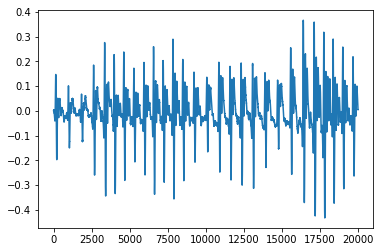

In [163]:
plt.plot(df.iloc[0:20000, 1])

In [9]:
df.shape

(4799800, 5)

In [10]:
from sklearn.preprocessing import MinMaxScaler

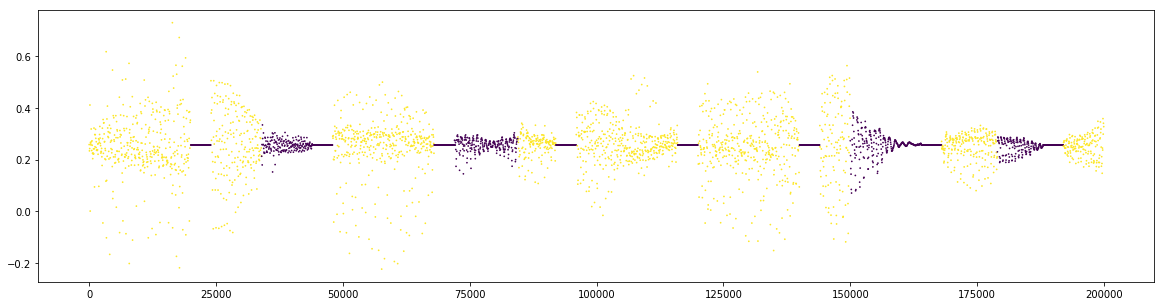

(4799800, 6)

In [11]:
mm = MinMaxScaler((-1,1))
mm.fit(df.iloc[:, 1].values.reshape(-1, 1))
df["scaledBuzz"] = mm.transform(df.iloc[:, 1].values.reshape(-1, 1))


subSamp = np.arange(0, 200000, step = 50)# np.arange(0, df.shape[0], step = 5)
plt.figure(figsize=(20,5))
plt.scatter(df.index[subSamp], df.iloc[subSamp,5], s = 0.5, c = df.iloc[subSamp,3])
#plt.scatter(df.index[subSamp], df.iloc[subSamp,2]*10, s = 0.5, c = df.iloc[subSamp,3])
plt.show()
df.shape

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

C:\Users\calli\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import CuDNNLSTM

earlystop = EarlyStopping(monitor='loss', patience=7, verbose=1, mode='auto')

# create a sequence classification instance
def get_sequence(kk , n_timesteps):
    # create a sequence of random numbers in [0,1]
    X = np.array(df.iloc[(kk):((kk + n_timesteps)), 5])
    # calculate cut-off value to change class values
    y = np.array(df.iloc[(kk):((kk + n_timesteps)), 3])
    # reshape input and output data to be suitable for LSTMs
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

# define problem properties
n_timesteps = 100000
# define LSTM
model = Sequential()
model.add(CuDNNLSTM(200, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM

samples = np.random.choice(range(df.shape[0]), 100, replace = False)

# generate new random sequence
X,y = get_sequence(0, n_timesteps)
# fit model for one epoch on this sequence
model.fit(X,y, batch_size = 10000, verbose = 1, epochs  = 100, callbacks=[earlystop])

# evaluate LSTM
X,y = get_sequence(n_timesteps, n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
    print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.6943 - acc: 0.4110
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 0.6886 - acc: 0.6151
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.6829 - acc: 0.6148
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.6776 - acc: 0.6147
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.6726 - acc: 0.6147
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.6688 - acc: 0.6147
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.6694 - acc: 0.6148
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 0.6716 - acc: 0.6149
Epoch 9/100
1/1 [==============================] - 3s 3s/step - loss: 0.6697 - acc: 0.6149
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 0.6683 - acc: 0.6149
Epoch 11/100
1/1 [==============================] - 3s 3s/step - loss: 0.6681 - acc: 0.61

In [52]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import CuDNNLSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

earlystop = EarlyStopping(monitor='loss', patience=70, verbose=1, mode='auto')

# create a sequence classification instance
def get_sequence(kk , n_timesteps):
    # create a sequence of random numbers in [0,1]
    X = np.array(df.iloc[(kk):((kk + n_timesteps)), 5])
    # calculate cut-off value to change class values
    y = np.array(df.iloc[(kk):((kk + n_timesteps)), 3])
    # reshape input and output data to be suitable for LSTMs
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

# define problem properties
n_timesteps = 100000
# define LSTM
model = Sequential()
model.add(CuDNNLSTM(200, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM

samples = np.random.choice(range(df.shape[0]), 100, replace = False)

# generate new random sequence
X,y = get_sequence(0, n_timesteps)
# fit model for one epoch on this sequence
model.fit(X,y, batch_size = 10000, verbose = 1, epochs  = 1000, callbacks=[earlystop])

# evaluate LSTM
# X,y = get_sequence(n_timesteps, n_timesteps)
# yhat = model.predict_classes(X, verbose=0)
# for i in range(n_timesteps):
#     print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6927 - acc: 0.5801
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6858 - acc: 0.6120
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6788 - acc: 0.6129
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6725 - acc: 0.6138
Epoch 5/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6686 - acc: 0.6143
Epoch 6/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6736 - acc: 0.6147
Epoch 7/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6710 - acc: 0.6146
Epoch 8/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6688 - acc: 0.6146
Epoch 9/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6684 - acc: 0.6145
Epoch 10/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6687 - acc: 0.6146
Epoch 11/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6691 

1296584


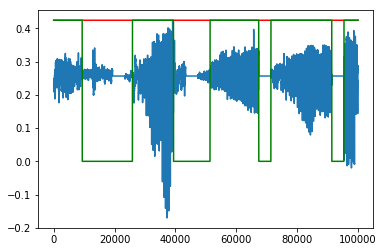

In [21]:
epoch = np.random.choice(range(df.shape[0]), 2, replace = False)

epoch = epoch[1]
print(epoch)

X,y = get_sequence(epoch, n_timesteps)
yhat = model.predict_classes(X, verbose=0)

plt.plot(X[0,:,0])
plt.plot(yhat[0,:,0]*np.max(X[0,:,0]), c = 'red')
plt.plot(y[0,:,0]*np.max(X[0,:,0]), c= 'green')

In [ ]:
plt.plot(X[0, :, 0])

Epoch 1/500
 - 1s - loss: 0.3146 - mean_absolute_error: 0.4935
Epoch 2/500
 - 0s - loss: 0.1965 - mean_absolute_error: 0.3707
Epoch 3/500
 - 0s - loss: 0.1064 - mean_absolute_error: 0.2873
Epoch 4/500
 - 0s - loss: 0.0651 - mean_absolute_error: 0.2046
Epoch 5/500
 - 0s - loss: 0.0611 - mean_absolute_error: 0.2034
Epoch 6/500
 - 0s - loss: 0.0573 - mean_absolute_error: 0.2110
Epoch 7/500
 - 0s - loss: 0.0571 - mean_absolute_error: 0.2120
Epoch 8/500
 - 0s - loss: 0.0512 - mean_absolute_error: 0.1948
Epoch 9/500
 - 0s - loss: 0.0515 - mean_absolute_error: 0.1942
Epoch 10/500
 - 0s - loss: 0.0496 - mean_absolute_error: 0.1974
Epoch 11/500
 - 0s - loss: 0.0500 - mean_absolute_error: 0.1988
Epoch 12/500
 - 0s - loss: 0.0492 - mean_absolute_error: 0.1945
Epoch 13/500
 - 0s - loss: 0.0495 - mean_absolute_error: 0.1936
Epoch 14/500
 - 0s - loss: 0.0490 - mean_absolute_error: 0.1958
Epoch 15/500
 - 0s - loss: 0.0492 - mean_absolute_error: 0.1969
Epoch 16/500
 - 0s - loss: 0.0491 - mean_absolute

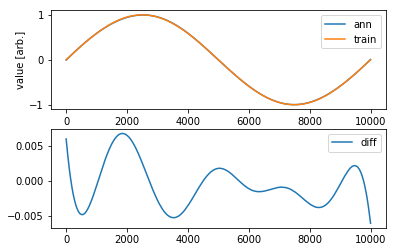

In [34]:
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

X = np.linspace(0.0 , 2.0 * np.pi, 10000).reshape(-1, 1)
Y = np.sin(X)

x_scaler = MinMaxScaler()
#y_scaler = MinMaxScaler(feature_range=(-1.0, 1.0))
y_scaler = MinMaxScaler()

X = x_scaler.fit_transform(X)
Y = y_scaler.fit_transform(Y)

earlystop = EarlyStopping(monitor='loss', patience=7, verbose=1, mode='auto')

model = Sequential()
model.add(Dense(400, input_dim=X.shape[1], kernel_initializer='uniform', activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history= model.fit(X, Y, epochs=500, batch_size=3200, verbose=2)#, callbacks=[earlystop])

res = model.predict(X, batch_size=3200)

res_rscl = y_scaler.inverse_transform(res)

Y_rscl = y_scaler.inverse_transform(Y)

plt.subplot(211)
plt.plot(res_rscl, label='ann')
plt.plot(Y_rscl, label='train')
plt.xlabel('#')
plt.ylabel('value [arb.]')
plt.legend()
plt.subplot(212)
plt.plot(Y_rscl - res_rscl, label='diff')
plt.legend()
plt.show()

dict_keys(['loss', 'mean_absolute_error'])


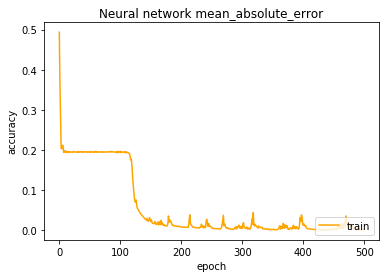

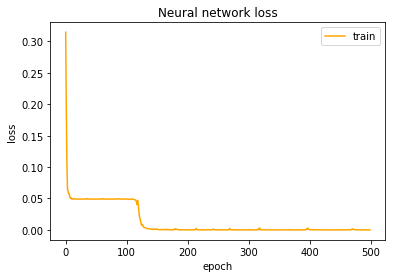

In [41]:
print(history.history.keys())


plt.plot(history.history['mean_absolute_error'], c = "orange")
plt.title('Neural network mean_absolute_error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'], c = "orange")
plt.title('Neural network loss')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.show()


In [49]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))


model = Sequential()
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

ValueError: The first layer in a Sequential model must get an `input_shape` or `batch_input_shape` argument.

In [691]:
# generate sequence
ts = np.arange(0, 1000)

seq = []
for ii in range(len(ts)):
    if ii < 5:
        seq.append(np.random.randn(1))
    else:
        seq.append(np.random.randn(1) + 0.8*seq[ii-1]+ 0.2*seq[ii - 2] - 0.0*seq[ii -4])

In [685]:
np.array(seq).shape

(1000, 1)

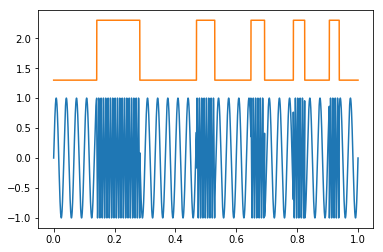

In [1129]:
#kk +=1

#seq = np.array(df.iloc[(kk*20000):((kk + 1) * 20000), 1])

timesteps = np.linspace(0, 1, num = 200000)
freq = ((np.sin(timesteps*timesteps/2*10*2*np.pi) + 1)**3 > 4 ) + 0.3
seq = np.sin((freq*100 * timesteps) * 2 * np.pi)
plt.plot(timesteps, seq)
plt.plot(timesteps, freq + 1)



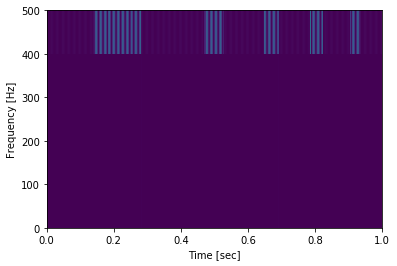

In [1130]:
from scipy import signal

f, t, Sxx = signal.spectrogram(np.array(seq), 200000, noverlap = 400, nperseg = 500)
Sxx = Sxx[0:10]
f = f[0:10]
plt.pcolormesh(t, f, Sxx)
plt.ylim(0,500)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

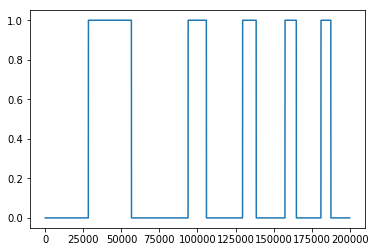

In [1131]:
buzzes = freq > 1.0
plt.plot(buzzes)

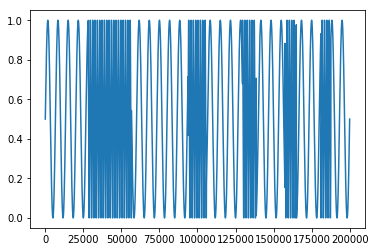

In [1132]:
# scale dataset
from sklearn.preprocessing import MinMaxScaler
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(np.array(seq).reshape(-1,1))
plt.plot(dataset)

In [1133]:
# create dataset

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 30

trainX, trainY = create_dataset(dataset[0:150000], look_back)
testX, testY = create_dataset(dataset[150001:], look_back)

print(trainY.shape)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



(149969,)


In [1134]:
testY.shape

(49968,)

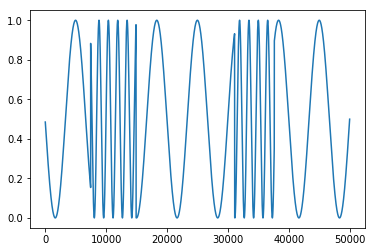

In [1135]:
plt.plot(testY)

In [1122]:
trainX.shape

(149969, 1, 30)

In [1137]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import CuDNNLSTM
from keras.layers import TimeDistributed
from keras.callbacks import EarlyStopping


earlystop = EarlyStopping(monitor='loss', patience=100, verbose=1, mode='auto', min_delta = 0.00001)

# create and fit the LSTM network
model = Sequential()
model.add(CuDNNLSTM(400, input_shape=(1, look_back), return_sequences = True))
model.add(CuDNNLSTM(400, return_sequences = True))
model.add((CuDNNLSTM(400)))
model.add((Dense(1)))
model.compile(loss='mean_squared_error', optimizer='adam')
hitory = model.fit(trainX, trainY, epochs=4000, batch_size=30000, verbose=1, callbacks = [earlystop])

Epoch 1/4000


InternalError: GPU sync failed

dict_keys(['loss'])


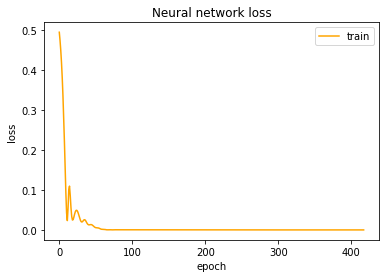

In [1107]:
print(hitory.history.keys())


plt.plot(hitory.history['loss'], c = "orange")
plt.title('Neural network loss')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.show()

In [1108]:
forwardSteps = 5000

for ii in range(forwardSteps):
    if(ii == 0): 
        Xtest = np.zeros((forwardSteps, 1, look_back))
        Xtest[ii, 0, :] = testX[0:1,:,:]
    else:
        tmp = model.predict(Xtest[(ii-1):(ii), :,:])      
        t2 = np.hstack([Xtest[ii-1, :, :], tmp])
        t3 = np.delete(t2, 0)
        t4 = t3.reshape(1,1,look_back)
        #Xtest = np.concatenate([Xtest, t4], axis = 0)
        Xtest[ii, 0, :] = t4
        
    if(np.mod(ii, 300) == 0):
        print(ii)
 

0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800


In [1109]:
Xtest.shape

(5000, 1, 3)

In [1110]:
trainY = trainY.reshape(-1)
testY = testY.reshape(-1)

In [1111]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(Xtest)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_s = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_s = scaler.inverse_transform([testY])

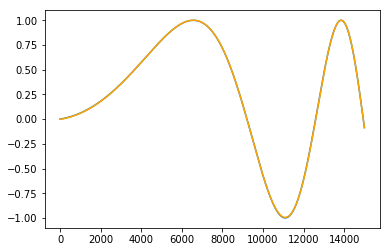

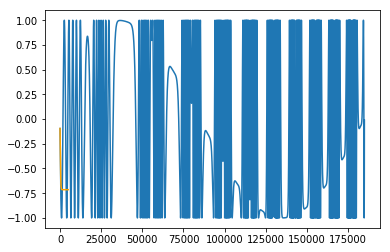

In [1112]:
# plot
plt.plot(trainY_s[0,:])
plt.plot(trainPredict, c="orange")
plt.show()

plt.plot(testY_s[0,:])
plt.plot(testPredict, c= 'orange')
#plt.xlim(0, 3)

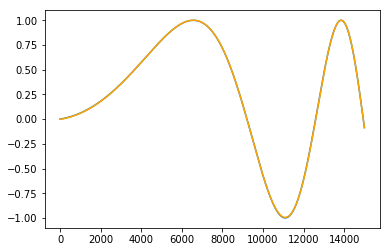

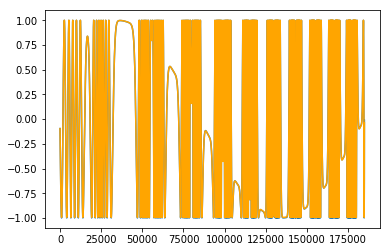

In [1113]:
trainY = trainY.reshape(-1)
testY = testY.reshape(-1)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# plot
plt.plot(trainY[0,:])
plt.plot(trainPredict, c="orange")
plt.show()

plt.plot(testY[0,:])
plt.plot(testPredict[1:], c= 'orange')